## **ЛАБОРАТОРНАЯ РАБОТА 2**

## **1. Установка библиотеки vk**

In [10]:
!pip install vk

  Created wheel for vk: filename=vk-2.0.2-py3-none-any.whl size=8277 sha256=e54ee1c7f8ecc42a1e8dfd1c04ddd60f54238113fef3bb491afcb95ae1c2356f
  Stored in directory: c:\users\211733\appdata\local\pip\cache\wheels\d3\da\b6\05c724eaf56853655695a546806e6bdf62fa6c3704adf771c0
Successfully built vk


In [9]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## **2. Подключение по токену**

### **2.1. Создание приложения в разделе "Разработчикам" на сайте vk.com и получение ID приложения**

In [ ]:
# 7861558

### **2.2. Получение разрешений**

In [4]:
#https://oauth.vk.com/authorize?client_id=7861558&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends,photos,audio,video,status,wall,groups,notifications,stories,offline&response_type=token

### **2.3. Получение токена**

In [ ]:
#https://oauth.vk.com/blank.html#access_token=517c6c6704f74d6d8d099d002dfbbf50c0b952feada4850bf9f8dcfe309baa0b67c88d33abfd6d8640837&expires_in=86400&user_id=175306015

### **2.4. Запуск сессии**

In [14]:
import vk

session = vk.Session(access_token='3cc0246c3cc0246c3cc0246c103cbce4c433cc03cc0246c5e4d2ec74e119e87b159f25d')

api = vk.API(session)

In [15]:
version = 5.131

## **3. Выгрузка друзей**

In [17]:
friends = api.friends.get(v = version, user_id = 175306015)
print('Количество друзей:', friends['count'])

Количество друзей: 124


In [22]:
friends['items']

[2281274,
 2539966,
 2921688,
 2961287,
 4191918,
 7633267,
 9307621,
 11877887,
 17398595,
 17919519,
 18174004,
 18324205,
 19254794,
 20823004,
 20861844,
 21794509,
 22455865,
 22461651,
 23385542,
 23773778,
 23840975,
 24111022,
 25029320,
 25280912,
 27189177,
 30218771,
 30609490,
 31099751,
 31531831,
 32287741,
 32634986,
 34006994,
 34411858,
 34431992,
 35237009,
 35300879,
 37841683,
 38316832,
 39429065,
 39448158,
 42173794,
 42537146,
 42745216,
 43780173,
 44334003,
 44700369,
 45802135,
 47511973,
 48401162,
 49389953,
 49588354,
 50766202,
 53841608,
 59955104,
 61479146,
 62832353,
 63065727,
 63321547,
 64627775,
 64915998,
 65306494,
 67627681,
 67639632,
 68118949,
 68449931,
 70421147,
 71696872,
 78213536,
 79839515,
 82556286,
 82900744,
 86335067,
 93048838,
 93139868,
 94337545,
 95785423,
 96864952,
 101312238,
 101760635,
 103984985,
 105895628,
 110286782,
 113396261,
 118239830,
 120260028,
 122433341,
 123301234,
 132937819,
 133898909,
 134101354,
 136

In [23]:
friends_ids_list = friends['items']
fields_name = [
               'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count', 'common_count', 
               'is_closed', 'can_access_closed', 'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default'
              ]

In [29]:
api.users.get(v = version, user_id = 62832353)

[{'id': 62832353,
  'first_name': 'Danila',
  'last_name': 'Repin',
  'can_access_closed': True,
  'is_closed': False}]

In [33]:
dict_users_requests = {}
results = []

for friend in friends_ids_list:
    dict_results = {}
    dict_users_requests = {}
    for column in fields_name:
        try:
            dict_results = {column: 
                      api.users.get(user_ids = friend,
                      v = version,
                      fields = column)[0][column]
                      }
        except:
            dict_results = {column: np.nan}
        finally:
            dict_users_requests.update(dict_results)
        time.sleep(0.05)
    results.append(dict_users_requests)

df = pd.DataFrame(results)

with pd.ExcelWriter('friends.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')

In [35]:
df = pd.read_excel('friends.xlsx')
df.head(20)

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Ivan,Bokovanov,2281274,2,7.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,1888.0,...,"THINK, DREAM, LIVE BIG!!!!",NaN,NaN,NaN,NaN,"{'albums': 6, 'audios': 0, 'followers': 1888, ...",1,"{'id': 1173072, 'name': 'СПбГЭУ', 'type': 'uni...",instagram.com/ivanbokovanov,all
1,1,Yury,Um,2539966,2,18.9.1989,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,"Мы рождены, чтоб Кафку сделать былью!",NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 329, 'subs...",1,"{'name': 'Аура-Тех', 'type': 'work'}",NaN,all
2,2,Anya,Sinyavskaya,2921688,1,28.12,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,Self-conquest is the greatest of victories.,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 47, 'subsc...",1,NaN,NaN,all
3,3,Nastyona,Tupoleva,2961287,1,23.8.1997,NaN,Североморск,1.0,212.0,...,NaN,1.0,"[{'chair': 1936, 'chair_name': ' Кафедра «Спец...",NaN,NaN,"{'albums': 4, 'audios': 0, 'followers': 212, '...",1,"{'id': 250, 'name': 'МГТУ им. Н. Э. Баумана', ...",NaN,all
4,4,Misha,Nurimanov,4191918,2,NaN,"{'id': 1, 'title': 'Russia'}",NaN,1.0,181.0,...,Отец (не святой) 🤘 😎 Ведущий (не инженер🛠) 🎙🐯 ...,0.0,[],NaN,NaN,"{'albums': 2, 'audios': 572, 'followers': 181,...",1,NaN,http://mishatopshow.ru/,all
5,5,Yana,Novgorodova,7633267,1,16.6.1999,"{'id': 1, 'title': 'Russia'}",Москва♥,1.0,833.0,...,Самый лучший,8.0,[],NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 833, '...",1,"{'name': 'не работаю', 'type': 'work'}",https://ask.fm/Yawkaa,owner
6,6,Dima,Eliseev,9307621,2,NaN,"{'id': 1, 'title': 'Russia'}",Москва,1.0,149.0,...,«Нормальность — это асфальтированная дорога: п...,0.0,[],NaN,NaN,"{'albums': 0, 'audios': 2356, 'followers': 149...",1,NaN,NaN,owner
7,7,Vanya,Metelkov,11877887,2,23.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,133.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 1, 'audios': 0, 'followers': 133, '...",1,"{'id': 250, 'name': 'МГТУ им. Н. Э. Баумана', ...",NaN,all
8,8,Alexander,Goryunov,17398595,2,1.11.1991,"{'id': 1, 'title': 'Russia'}",NaN,1.0,128.0,...,Да,NaN,NaN,NaN,NaN,"{'albums': 2, 'audios': 181, 'followers': 128,...",1,"{'id': 6627, 'name': 'ВлГУ им. А. Г. и Н. Г. С...",NaN,all
9,9,Alexandra,Semenikhina,17919519,1,5.10.1997,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,IG: semenishkin\nSC: alexa_051097,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 60, 'subsc...",1,"{'id': 755525, 'name': 'Leighton Park School',...",NaN,all


In [47]:
df1= pd.read_excel('friends_misha.xlsx')

In [49]:
df_new=pd.concat([df,df1])

In [51]:
df_new

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Ivan,Bokovanov,2281274,2,7.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,1888.0,...,"THINK, DREAM, LIVE BIG!!!!",NaN,NaN,NaN,NaN,"{'albums': 6, 'audios': 0, 'followers': 1888, ...",1,"{'id': 1173072, 'name': 'СПбГЭУ', 'type': 'uni...",instagram.com/ivanbokovanov,all
1,1,Yury,Um,2539966,2,18.9.1989,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,"Мы рождены, чтоб Кафку сделать былью!",NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 329, 'subs...",1,"{'name': 'Аура-Тех', 'type': 'work'}",NaN,all
2,2,Anya,Sinyavskaya,2921688,1,28.12,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,Self-conquest is the greatest of victories.,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 47, 'subsc...",1,NaN,NaN,all
3,3,Nastyona,Tupoleva,2961287,1,23.8.1997,NaN,Североморск,1.0,212.0,...,NaN,1.0,"[{'chair': 1936, 'chair_name': ' Кафедра «Спец...",NaN,NaN,"{'albums': 4, 'audios': 0, 'followers': 212, '...",1,"{'id': 250, 'name': 'МГТУ им. Н. Э. Баумана', ...",NaN,all
4,4,Misha,Nurimanov,4191918,2,NaN,"{'id': 1, 'title': 'Russia'}",NaN,1.0,181.0,...,Отец (не святой) 🤘 😎 Ведущий (не инженер🛠) 🎙🐯 ...,0.0,[],NaN,NaN,"{'albums': 2, 'audios': 572, 'followers': 181,...",1,NaN,http://mishatopshow.ru/,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,Dmitry,Kunaev,572089194,2,6.9.1981,"{'id': 1, 'title': 'Russia'}",NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 5, 'gi...",1,NaN,NaN,all
190,190,Vlad,Zelenenko,573974339,2,30.4.1999,NaN,NaN,1.0,3.0,...,NaN,0.0,[],NaN,NaN,"{'albums': 1, 'audios': 0, 'followers': 3, 'gi...",1,NaN,NaN,all
191,191,Nikolay,Stepin,581984398,2,NaN,"{'id': 1, 'title': 'Russia'}",Люберцы,1.0,12.0,...,NaN,0.0,[],NaN,NaN,"{'albums': 0, 'audios': 1, 'followers': 12, 'g...",1,NaN,NaN,all
192,192,Easy,Game,641516641,2,NaN,"{'id': 1, 'title': 'Russia'}",NaN,1.0,13.0,...,NaN,0.0,[],NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 13, 'g...",1,NaN,https://www.instagram.com/easygame_agency/,all


,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
2,2,Anya,Sinyavskaya,2921688,1,28.12,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,Self-conquest is the greatest of victories.,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 47, 'subsc...",1,NaN,NaN,all
53,53,Anya,Tolkacheva,59955104,1,29.8,"{'id': 1, 'title': 'Russia'}",NaN,1.0,416.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 416, '...",1,"{'id': 326, 'name': 'РЭУ им. Г. В. Плеханова',...",NaN,all
120,120,Anya,Bestbrend,450457131,1,NaN,"{'id': 1, 'title': 'Russia'}",Москва,1.0,30.0,...,работа здесь,0.0,[],NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 30, 'p...",1,NaN,NaN,all


In [53]:
df_new.isnull().sum()

Unnamed: 0                     0
first_name                     0
last_name                      7
id                             0
sex                            0
bdate                         59
country                       43
home_town                    259
has_mobile                    11
followers_count               94
common_count                 318
is_closed                     11
can_access_closed             11
can_see_audio                 11
online                         0
city                          68
timezone                     318
can_post                       0
can_write_private_message      0
can_see_all_posts             11
contacts                     318
status                       195
relation                     224
universities                 224
nickname                     306
deactivated                  307
counters                      11
has_photo                      0
occupation                   114
site                         292
wall_defau

In [60]:
df_new.occupation.value_counts()

{'id': 348, 'name': 'Финансовый университет при Правительстве РФ (бывш. ФА при Правительстве РФ)', 'type': 'university'}    43
{'id': 250, 'name': 'МГТУ им. Н. Э. Баумана', 'type': 'university'}                                                         38
{'id': 128, 'name': 'НИУ ВШЭ (ГУ-ВШЭ)', 'type': 'university'}                                                                4
{'id': 338, 'name': 'РУДН', 'type': 'university'}                                                                            4
{'id': 326, 'name': 'РЭУ им. Г. В. Плеханова', 'type': 'university'}                                                         3
                                                                                                                            ..
{'id': 133082132, 'name': 'Фотолаборатория Точка цвета', 'type': 'work'}                                                     1
{'id': 334, 'name': 'РГУ нефти и газа (НИУ) им. И. М. Губкина', 'type': 'university'}                          

In [ ]:
#id, country, has_mobile, common_count, online, timezone, can_post, contacts, status, relation, universities, nickname, deactivated, occupation, site, has_photo

In [61]:
df_neww = df_new.drop(['id', 'country', 'has_mobile', 'common_count', 'online', 'timezone', 'can_post', 'contacts', 'status', 'relation', 'universities', 'nickname', 'deactivated', 'occupation', 'site', 'has_photo'], axis =1)

In [64]:
df_neww.isnull().sum()

Unnamed: 0                     0
first_name                     0
last_name                      7
sex                            0
bdate                         59
home_town                    259
followers_count               94
is_closed                     11
can_access_closed             11
can_see_audio                 11
city                          68
can_write_private_message      0
can_see_all_posts             11
counters                      11
wall_default                  11
dtype: int64

## **4. Работа с признаками**

### **4.1. Работа с признаком sex**

In [36]:
df.sex.value_counts()

2    89
1    35
Name: sex, dtype: int64

<AxesSubplot:>

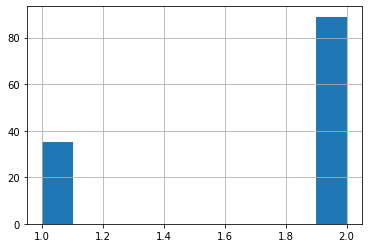

In [37]:
df.sex.hist()

### **4.2. Работа с признаком home_town**

In [67]:
df_neww.home_town.unique()

array([nan, 'Североморск', 'Москва♥', 'Москва', 'Самара', 'Калининград',
       'Дыдылдино', 'Воронеж', 'Саратов', 'москва', 'Волжский',
       'Гусь-Хрустальный', 'Щелково', 'Оленегорск', 'Новомосковск',
       'Пермь', 'Нижнекамск', 'Гомель', 'Moscow', 'Воскресенск', 'Рязань',
       'Обнинск', 'Ижевск', 'Мирный', 'г. Рязань', 'Кимры', 'Ереван',
       'Хабаровск', 'mid', 'Люберцы'], dtype=object)

In [69]:
set(df_neww.home_town)

{'Moscow',
 'mid',
 nan,
 'Волжский',
 'Воронеж',
 'Воскресенск',
 'Гомель',
 'Гусь-Хрустальный',
 'Дыдылдино',
 'Ереван',
 'Ижевск',
 'Калининград',
 'Кимры',
 'Люберцы',
 'Мирный',
 'Москва',
 'Москва♥',
 'Нижнекамск',
 'Новомосковск',
 'Обнинск',
 'Оленегорск',
 'Пермь',
 'Рязань',
 'Самара',
 'Саратов',
 'Североморск',
 'Хабаровск',
 'Щелково',
 'г. Рязань',
 'москва'}

In [83]:
indexes = np.arange(318)
df_neww.index = indexes


In [85]:
df_neww

,Unnamed: 0,first_name,last_name,sex,bdate,home_town,followers_count,is_closed,can_access_closed,can_see_audio,city,can_write_private_message,can_see_all_posts,counters,wall_default
0,0,Ivan,Bokovanov,2,7.1,NaN,1888.0,0.0,1.0,0.0,"{'id': 2, 'title': 'Saint Petersburg'}",1,0.0,"{'albums': 6, 'audios': 0, 'followers': 1888, ...",all
1,1,Yury,Um,2,18.9.1989,NaN,NaN,1.0,0.0,0.0,"{'id': 1, 'title': 'Moscow'}",1,0.0,"{'albums': 0, 'audios': 0, 'pages': 329, 'subs...",all
2,2,Anya,Sinyavskaya,1,28.12,NaN,NaN,1.0,0.0,0.0,"{'id': 1, 'title': 'Moscow'}",1,0.0,"{'albums': 0, 'audios': 0, 'pages': 47, 'subsc...",all
3,3,Nastyona,Tupoleva,1,23.8.1997,Североморск,212.0,0.0,1.0,0.0,"{'id': 1, 'title': 'Moscow'}",1,0.0,"{'albums': 4, 'audios': 0, 'followers': 212, '...",all
4,4,Misha,Nurimanov,2,NaN,NaN,181.0,0.0,1.0,1.0,"{'id': 1, 'title': 'Moscow'}",1,1.0,"{'albums': 2, 'audios': 572, 'followers': 181,...",all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,189,Dmitry,Kunaev,2,6.9.1981,NaN,5.0,0.0,1.0,1.0,"{'id': 1, 'title': 'Moscow'}",1,1.0,"{'albums': 0, 'audios': 0, 'followers': 5, 'gi...",all
314,190,Vlad,Zelenenko,2,30.4.1999,NaN,3.0,0.0,1.0,1.0,NaN,1,1.0,"{'albums': 1, 'audios': 0, 'followers': 3, 'gi...",all
315,191,Nikolay,Stepin,2,NaN,Люберцы,12.0,0.0,1.0,1.0,"{'id': 1, 'title': 'Moscow'}",0,1.0,"{'albums': 0, 'audios': 1, 'followers': 12, 'g...",all
316,192,Easy,Game,2,NaN,NaN,13.0,0.0,1.0,1.0,"{'id': 1, 'title': 'Moscow'}",1,1.0,"{'albums': 0, 'audios': 0, 'followers': 13, 'g...",all


In [94]:
df_neww.loc[df_neww[(df_neww.home_town.isna() == False) & (df_neww.city.isna() == True)].index]

,Unnamed: 0,first_name,last_name,sex,bdate,home_town,followers_count,is_closed,can_access_closed,can_see_audio,city,can_write_private_message,can_see_all_posts,counters,wall_default
76,76,Nikolay,Gamov,2,16.12.1997,Москва,119.0,0.0,1.0,0.0,NaN,1,0.0,"{'albums': 0, 'audios': 0, 'followers': 119, '...",all
77,77,Damir,Mubarakshin,2,24.8.1998,Щелково,38.0,0.0,1.0,0.0,NaN,1,1.0,"{'albums': 4, 'audios': 0, 'followers': 38, 'g...",owner
154,30,Anastasia,Zhdanova,1,2.4.1999,Moscow,210.0,0.0,1.0,0.0,NaN,0,0.0,"{'albums': 0, 'audios': 0, 'followers': 210, '...",owner
227,103,Nikita,Ermoshin,2,23.6,Moscow,76.0,0.0,1.0,0.0,NaN,1,0.0,"{'albums': 1, 'audios': 0, 'followers': 76, 'p...",all


In [92]:
df_neww.city.fillna(df_neww.home_town)

0      {'id': 2, 'title': 'Saint Petersburg'}
1                {'id': 1, 'title': 'Moscow'}
2                {'id': 1, 'title': 'Moscow'}
3                {'id': 1, 'title': 'Moscow'}
4                {'id': 1, 'title': 'Moscow'}
                        ...                  
313              {'id': 1, 'title': 'Moscow'}
314                                       NaN
315              {'id': 1, 'title': 'Moscow'}
316              {'id': 1, 'title': 'Moscow'}
317         {'id': 1702, 'title': 'Toulouse'}
Name: city, Length: 318, dtype: object

,Unnamed: 0,first_name,last_name,sex,bdate,home_town,followers_count,is_closed,can_access_closed,can_see_audio,city,can_write_private_message,can_see_all_posts,counters,wall_default
76,76,Nikolay,Gamov,2,16.12.1997,Москва,119.0,0.0,1.0,0.0,NaN,1,0.0,"{'albums': 0, 'audios': 0, 'followers': 119, '...",all
77,77,Damir,Mubarakshin,2,24.8.1998,Щелково,38.0,0.0,1.0,0.0,NaN,1,1.0,"{'albums': 4, 'audios': 0, 'followers': 38, 'g...",owner


#### **4.2.1. Чистка городов**

##### **4.2.1.1. Работа с городом Набережные Челны**

In [ ]:
for i in df_copy.home_town:
    if 'челн' in i.lower(): df_copy.home_town.replace(i, 'Набережные Челны', inplace=True)

##### **4.2.1.2. Замена пустых значений и прочих**

In [ ]:
df_copy.home_town.replace('nan', 'Другой', inplace=True)
df_copy.home_town.replace('', 'Другой', inplace=True)
df_copy.home_town.replace('Москва ', 'Москва', inplace=True)

for i in df_copy.home_town:
    if 'ессентуки' in i.lower(): df_copy.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif 'самара' in i.lower(): df_copy.home_town.replace(i, 'Самара', inplace=True)
    elif 'айхал' in i.lower(): df_copy.home_town.replace(i, 'Айхал', inplace=True)

df_copy.home_town.unique()

array(['Москва', 'Воркута', 'Другой', 'Казань', 'Самара', 'Тверь',
       'Набережные Челны', 'Владивосток', 'Волгоград', 'Киров', 'Айхал',
       'Красногорск', 'Санкт-Петербург', 'Мензелинск', 'Madrid',
       'Обнинск', 'Смоленск', 'Баку', 'Пенза', 'Нурлат', 'Коломна',
       'Одесса', 'Иркутск', 'Сергиев-Посад 7', 'Липецк', 'Пермь',
       'Челябинск', 'Анапа', 'Бугуруслан', 'Нижний Тагил', 'ирбит',
       'Железнодорожный', 'Ижевск', 'Таджикистан', 'Королёв', 'Ярославль',
       'Слепцовск', 'Оренбург'], dtype=object)

### **4.3. Работа с признаком has_mobile**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


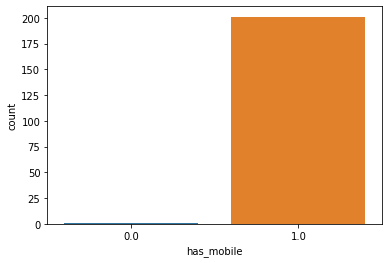

#### **4.3.1. Удаление признака has_mobile по причине наличия мобильного телефона у 201 из 204 друзей**

### **4.4. Работа с признаком followers_count**

Кол-во друзей с неизвестными подписчиками:  55


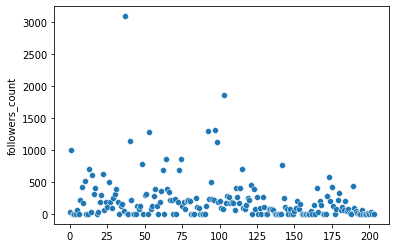

In [ ]:
df2 = df2.drop(df2[df2.followers_count > 3000].index)

### **4.5. Работа с признаком is_closed**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


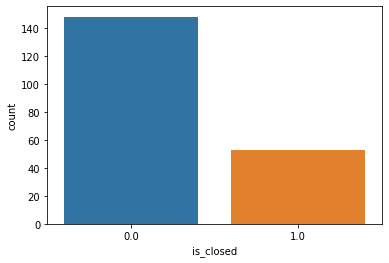

Кол-во друзей с пустым значением публичности профиля:  2


In [ ]:
df2['is_closed'].fillna(False, inplace = True)

### **4.6. Работа с признаком can_access_closed**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


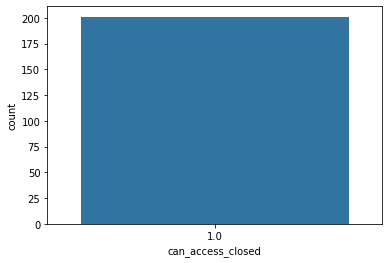

In [ ]:
len(df2[df2.can_access_closed != True])

2

#### **4.6.1. Удаление признака can_access_closed по причине наличия значения True у 202 из 204 друзей**

### **4.7. Работа с признаком can_see_audio**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


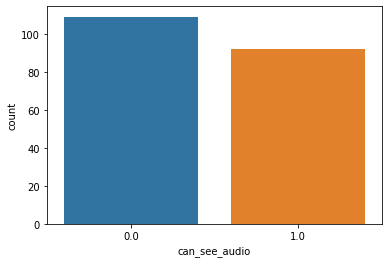

Кол-во друзей с пустым значением публичности аудио:  2


#### **4.7.1. Просмотр 2 друзей, у которых пустые значения на признаках публичности**

,first_name,last_name,id,sex,bdate,country,home_town,followers_count,common_count,is_closed,can_see_audio,online,city,timezone,can_post,can_write_private_message,can_see_all_posts,contacts,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
2,Денис,Тропин,5318307,0,NaN,NaN,Другой,0.0,NaN,False,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,deleted,NaN,0,NaN,NaN,NaN
171,Джавохир,Самиев,240347712,0,NaN,NaN,Другой,0.0,NaN,False,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,deleted,NaN,0,NaN,NaN,NaN


#### **4.7.2. Удаление двух друзей из набора данных по причине деактивации аккаунта**

In [ ]:
df2 = df2.reset_index()

### **4.8. Работа с признаком can_see_all_posts**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


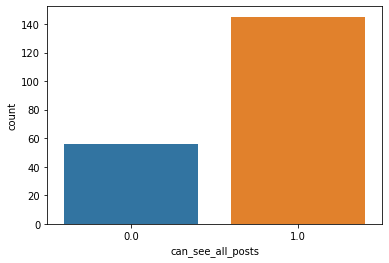

In [ ]:
print('Кол-во друзей с пустым значением публичности постов: ', ****)

Кол-во друзей с пустым значением публичности постов:  0


### **4.9. Работа с признаком online**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


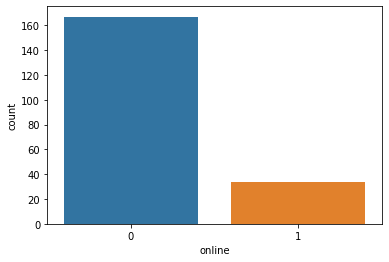

In [ ]:
print('Кол-во друзей с пустым значением онлайна: ',*****)

Кол-во друзей с пустым значением онлайна:  0


### **4.10. Работа с признаком timezone**

array([nan])

In [ ]:
del df2['timezone']

### **4.11. Работа с признаком can_post**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


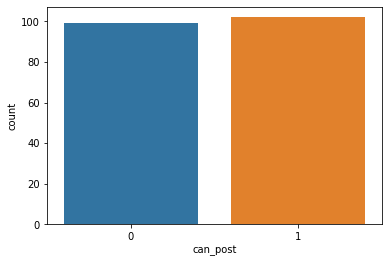

In [ ]:
print('Кол-во друзей с пустым значением публичности стены: ', )

Кол-во друзей с пустым значением публичности стены:  0


### **4.12. Работа с признаком can_write_private_message**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


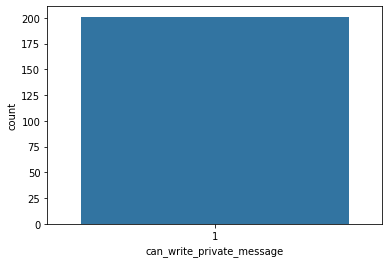

In [ ]:
print('Кол-во друзей с не доступом к написанию сообщения: ', )

Кол-во друзей с не доступом к написанию сообщения:  0


#### **4.12.1. Удаление признака can_write_private_message по причине его наличия у 202 из 202 друга**

In [ ]:
del df2['can_write_private_message']

### **4.13. Работа с признаком contacts**

In [ ]:
df2.contacts.unique()

array([nan])

#### **4.13.1. Удаление признака contacts по причине его пустых значений во всех строках**

In [ ]:
del df2['contacts']

### **4.14. Работа с признаком status**

array([nan, "I'm a helpless puppy 🐕",
       'Бер йотым су житэр иде сагынган чакларымда...',
       '✌️ insta: candezzy_ir', 'Мой Дозор окончен', 'Inst: marishanest',
       'подарим друг другу солнце',
       'when you reach these heights you rewrite what your fear is',
       'Для человека нет ничего прекраснее человека.',
       'И в мире нет таких вершин, что взять нельзя.',
       'Навсегда в сердце.27.07.15.',
       'Путь всегда сложен, но результат придет. Главное, не останавливаться',
       'а при встрече, он бы дарил өчпочмак...',
       'Хочется рухнуть в траву непомятую, В небо уставить глаза завидущие, И окунуться в цветочные запахи, И без конца обожать все живущее.',
       ':(', 'inst: mir.a_77', 'Расскажи о себе', '🎁',
       'Bond. Investment-grade bond.', 'inst: _vysochinskaya',
       '4.2/3.4/1:49', 'Просто так вышло',
       'Да будут у нас силы изменить то, что мы можем изменить, и мудрость принять то, что изменить не можем.',
       'meeh', 'Вяжу игрушки и делю

#### **4.14.1. Проверка пустых значений статуса**

105

#### **4.14.2. Конвертация признака status в категориальный признак с двумя значениями**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


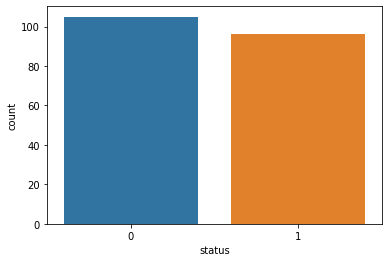

### **4.15. Работа с признаком relation**

In [ ]:
df4 = df3.copy(deep=True)
df4.relation.unique()

array([ 4.,  0.,  1., nan,  7.,  6.,  2.,  5.])

In [ ]:
df4['relation'].fillna(0, inplace = True)

#### **4.15.1. Категоризация признака relation**

In [ ]:
for i in df4.relation:
  if i == 0: df4.relation.replace(i, 'A', inplace=True)
  elif i == 1: df4.relation.replace(i, 'B', inplace=True)
  elif i == 2: df4.relation.replace(i, 'C', inplace=True)
  elif i == 3: df4.relation.replace(i, 'D', inplace=True)
  elif i == 4: df4.relation.replace(i, 'E', inplace=True)
  elif i == 5: df4.relation.replace(i, 'F', inplace=True)
  elif i == 6: df4.relation.replace(i, 'G', inplace=True)
  elif i == 7: df4.relation.replace(i, 'H', inplace=True)
  elif i == 8: df4.relation.replace(i, 'I', inplace=True)

df4.relation.unique()

array(['E', 'A', 'B', 'H', 'G', 'C', 'F'], dtype=object)

### **4.16. Работа с признаком deactivated**

In [ ]:
df4.deactivated.unique()

array([nan], dtype=object)

In [ ]:
del df4['deactivated']

### **4.17. Работа с признаком has_photo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


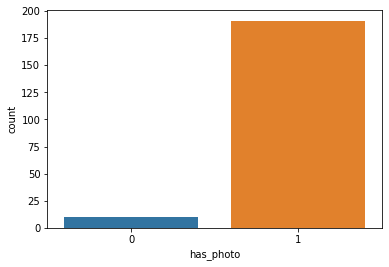

In [ ]:
df5 = df4.copy(deep=True)

sns.countplot(df5.has_photo)

### **4.18. Работа с признаком site**

In [ ]:
df6 = df5.copy(deep=True)

df6.site.unique()

array([nan, 'http://askfm.im/id5504158', 'rb.fu.69@gmail.com', '     ',
       'http://likara01.deviantart.com/',
       'http://www.youtube.com/user/UliaDudkina/videos',
       'https://steamcommunity.com/profiles/76561198081835889',
       'https://t.me/ja_zdes_sluchaino/4', 'Nrsmsf.ru', '..............',
       'vk.com/memesfa', 'inst: olyawar666', ' ',
       'https://ask.fm/Fedor_Medved', 'http://askfm.im/id138071980',
       'www.flickr.com/photos/mianya/',
       'https://instagram.com/_aksiniya___', ' ask.fm/Vitalik1543',
       'https://instagram.com/adelya_albertovna',
       'https://vk.com/app5337911_159975254',
       'https://www.instagram.com/levilasw0w',
       'http://vk.com/pavel_popov_photography', 'ask.fm/id186217602',
       'https://www.instagram.com/mr.dubchuk/',
       'http://sitehub.ezyro.com/konv%C4%93rt%C4%93r.html',
       'https://www.instagram.com/mzhansheev/',
       'https://www.instagram.com/mtoria18',
       'https://ask.fm/maxdx1997?utm_source=copy_l

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


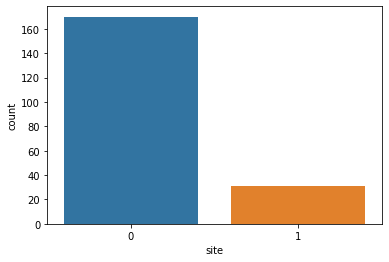

In [ ]:
df6['site'].fillna(0, inplace = True)

for i in df6.site:
  if i != 0: df6.site.replace(i, 1, inplace=True)

sns.countplot(df6.site)

### **4.19. Работа с признаком wall_default**

In [ ]:
df7 = df6.copy(deep=True)

df7.wall_default.unique()

array(['all', 'owner'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


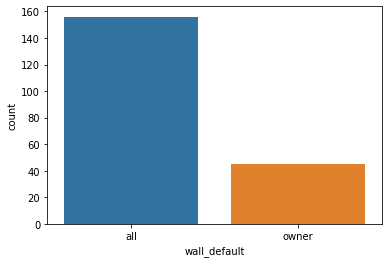

In [ ]:
df7.wall_default.replace('all', 1, inplace=True)
df7.wall_default.replace('owner', 0, inplace=True)

### **4.20. Работа с признаком counters**

In [ ]:


df8.counters[0]

"{'albums': 10, 'audios': 65, 'followers': 27, 'friends': 156, 'online_friends': 1, 'pages': 11, 'photos': 322, 'subscriptions': 0, 'user_photos': 25, 'videos': 78, 'mutual_friends': 1, 'clips_followers': 183}"

In [ ]:
df8['albums'] = 0
df8['audios'] = 0
df8['friends'] = 0
df8['photos'] = 0
df8['videos'] = 0

m = 0
for i in df8.counters:

  d = eval(i)
  df8['albums'][m] = d['albums']
  df8['audios'][m] = d['audios']
  df8['friends'][m] = d['friends']
  df8['photos'][m] = d['photos']
  df8['videos'][m] = d['videos']

  m += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

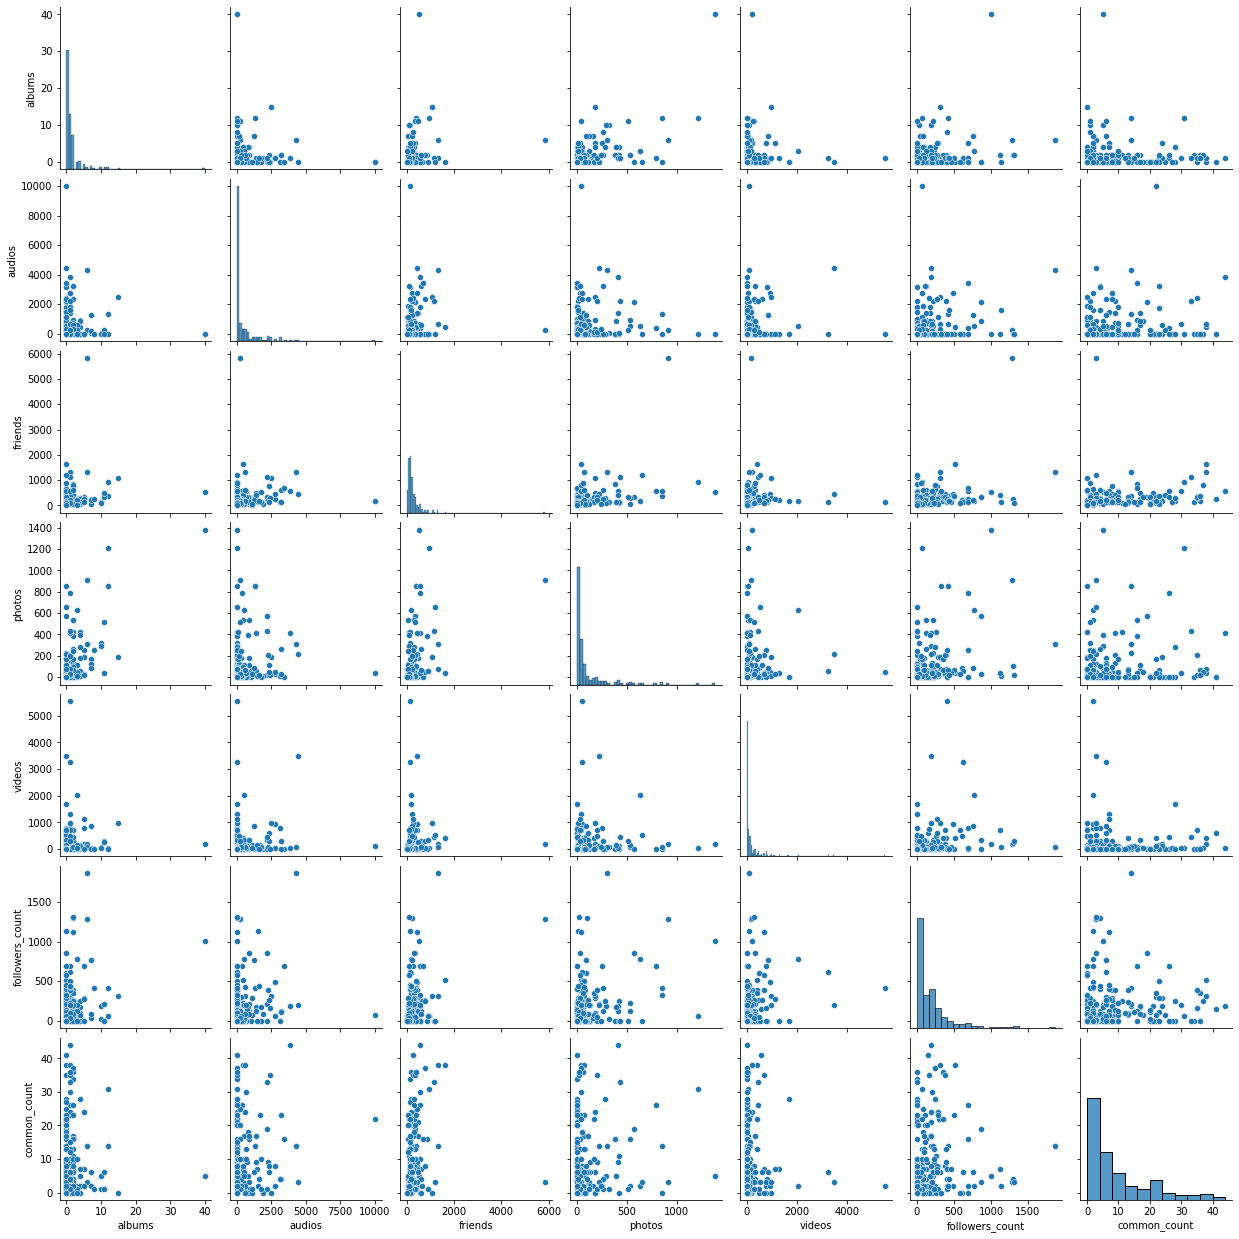

In [ ]:
sns.pairplot(data=df8[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

#### **4.20.1. Удаление выбросов**

In [ ]:
columns = ['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']

In [ ]:
for i in columns:
  Q3 = np.quantile(df8[i], 0.85)
  Q1 = np.quantile(df8[i], 0.25)
  TIQR = 3 * (Q3 - Q1)
  df8 = df8.drop(df8[df8[i] > (Q3 + TIQR)].index)
  df8 = df8.drop(df8[df8[i] < (Q1 - TIQR)].index)

In [ ]:
df8 = df8.reset_index()

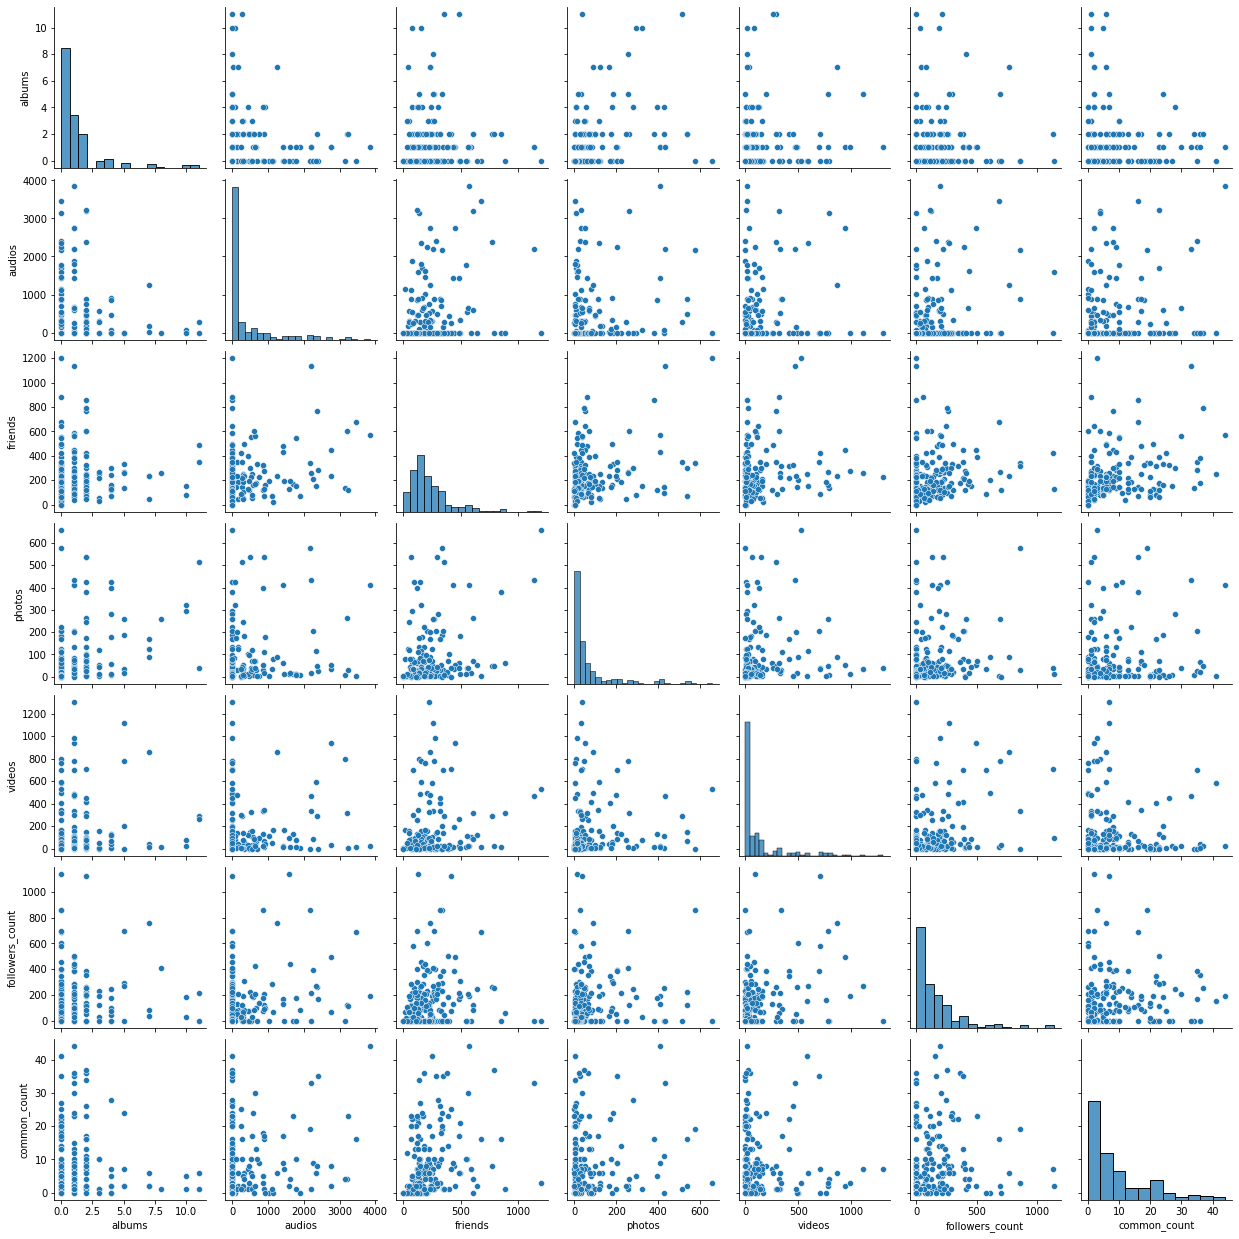

In [ ]:
sns.pairplot(data=df8[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

### **4.21. Работа с признаком bdate**

In [ ]:
df9 = df8.copy(deep=True)

In [ ]:
df9.columns

Index(['level_0', 'index', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'country', 'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_see_audio', 'online', 'city', 'can_post', 'can_see_all_posts',
       'status', 'relation', 'universities', 'nickname', 'counters',
       'has_photo', 'occupation', 'site', 'wall_default', 'albums', 'audios',
       'friends', 'photos', 'videos'],
      dtype='object')

### **4.22. Работа с признаком country**

In [ ]:
df8.country

0      {'id': 1, 'title': 'Россия'}
1      {'id': 1, 'title': 'Россия'}
2      {'id': 1, 'title': 'Россия'}
3      {'id': 1, 'title': 'Россия'}
4      {'id': 1, 'title': 'Россия'}
                   ...             
178    {'id': 1, 'title': 'Россия'}
179                             NaN
180    {'id': 1, 'title': 'Россия'}
181                             NaN
182    {'id': 1, 'title': 'Россия'}
Name: country, Length: 183, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


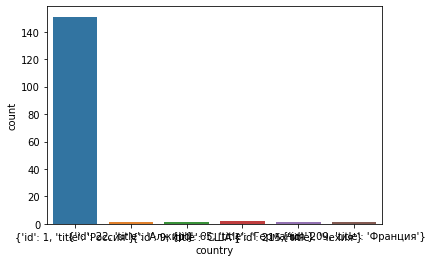

In [ ]:
sns.countplot(df8.country)

#### **4.22.1. Мои друзья с России, поэтому признак страны не будет являться информативным**

In [ ]:
del df8['country']

### **4.23. Работа с признаком occupation**

In [ ]:
df81 = df8.copy(deep=True)

In [ ]:
df81.occupation

0      {'id': 43879844, 'name': 'Московский аэропорт ...
1      {'id': 21685844, 'name': 'MMS-Team. Блог коман...
2                                                    NaN
3      {'id': 128, 'name': 'НИУ ВШЭ (ГУ-ВШЭ)', 'type'...
4      {'id': 348, 'name': 'Финансовый университет пр...
                             ...                        
178                                                  NaN
179                                                  NaN
180                                                  NaN
181    {'id': 53439257, 'name': 'МБОУ " Гимназия №26 ...
182                                                  NaN
Name: occupation, Length: 183, dtype: object

In [ ]:
df81['occupation'].fillna("{'id': 11111, 'name': 'Не указано'}", inplace = True)

In [ ]:
df81['work'] = 0

m = 0
for i in df81.occupation:

  d = eval(i)
  df81['work'][m] = d['name']

  m += 1

### **4.24. Работа с признаком city**

In [ ]:
df82 = df81.copy(deep=True)

In [ ]:
df82['city'].fillna("{'id': 11111, 'title': 'Другой'}", inplace = True)

In [ ]:
df82.city

0               {'id': 1, 'title': 'Москва'}
1              {'id': 60, 'title': 'Казань'}
2               {'id': 1, 'title': 'Москва'}
3               {'id': 1, 'title': 'Москва'}
4               {'id': 1, 'title': 'Москва'}
                       ...                  
178    {'id': 2, 'title': 'Санкт-Петербург'}
179         {'id': 11111, 'title': 'Другой'}
180             {'id': 1, 'title': 'Москва'}
181         {'id': 11111, 'title': 'Другой'}
182         {'id': 11111, 'title': 'Другой'}
Name: city, Length: 183, dtype: object

In [ ]:
df82['city_new'] = 0

m = 0
for i in df82.city:

  d = eval(i)
  df82['city_new'][m] = d['title']

  m += 1

In [ ]:
df10 = df82.copy(deep=True)

In [ ]:
df10['is_closed'] = df10.is_closed.astype(int)
df10['can_see_audio'] = df10.can_see_audio.astype(int)
df10['can_see_all_posts'] = df10.can_see_all_posts.astype(int)
df10['followers_count'] = df10.followers_count.astype(int)
df10['common_count'] = df10.common_count.astype(int)

### **4.24. Создание синтетических признаков transparency_level и media**

In [ ]:
df10['transparency_level'] = df10.is_closed + df10.can_see_audio + df10.can_post + df10.can_see_all_posts + df10.has_photo + df10.site + df10.wall_default

In [ ]:
df10['media'] = df10.audios + df10.videos + df10.photos

In [ ]:
del df10['level_0']
del df10['index']

In [ ]:
df10.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'home_town',
       'followers_count', 'common_count', 'is_closed', 'can_see_audio',
       'online', 'city', 'can_post', 'can_see_all_posts', 'status', 'relation',
       'universities', 'nickname', 'counters', 'has_photo', 'occupation',
       'site', 'wall_default', 'albums', 'audios', 'friends', 'photos',
       'videos', 'work', 'city_new', 'transparency_level', 'media'],
      dtype='object')

In [ ]:
df101 = df10[
             
             ['sex', 'first_name', 'last_name', 'relation', 'home_town', 'city_new', 'work',
               'friends', 'followers_count', 'common_count', 'transparency_level', 'media', 'albums']
             
]

In [ ]:
df101.head()

,sex,first_name,last_name,relation,home_town,city_new,work,friends,followers_count,common_count,transparency_level,media,albums
0,0,Сергей,Ануфриев,E,Москва,Москва,Московский аэропорт Домодедово,156,27,1,5,465,10
1,1,Кристина,Мирибян,B,Казань,Казань,MMS-Team. Блог команды капперов.,138,0,9,4,247,1
2,1,Татьяна,Маркелова,A,Другой,Москва,Не указано,287,0,9,3,342,0
3,0,Александр,Соколовский,A,Другой,Москва,НИУ ВШЭ (ГУ-ВШЭ),269,0,1,2,4,0
4,0,Роман,Васильев,A,Другой,Москва,Финансовый университет при Правительстве РФ (б...,263,217,1,5,2537,1


### **5. Преобразование категориальных признаков в числовые**

In [ ]:
from sklearn.preprocessing import *

df_le = df101.copy(deep=True)
categorical_feature_mask = df_le.dtypes==object
categorical_cols = df_le.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df_le[categorical_cols] = df_le[categorical_cols].apply(lambda col: le.fit_transform(col))
df_le = df_le[categorical_cols]
#df_le = df_le.reset_index()
#df_le = df_le.astype(float)
#del df_le['index']

In [ ]:
df_le.head()

,first_name,last_name,relation,home_town,city_new,work
0,112,15,3,17,14,35
1,70,102,1,11,9,5
2,113,97,0,7,14,44
3,16,139,0,7,14,37
4,108,35,0,7,14,52


### **6. Создание набора данных числовых признаков**

In [ ]:
digit_feature_mask = df101.dtypes==int
digit_cols = df101.columns[digit_feature_mask].tolist()

In [ ]:
digit_cols

['sex',
 'friends',
 'followers_count',
 'common_count',
 'transparency_level',
 'media',
 'albums']

In [ ]:
df_digit = df101[['sex', 'followers_count', 'common_count',
                 'albums', 'friends', 'media', 'transparency_level']]

### **7. Тепловая карта числовых признаков**

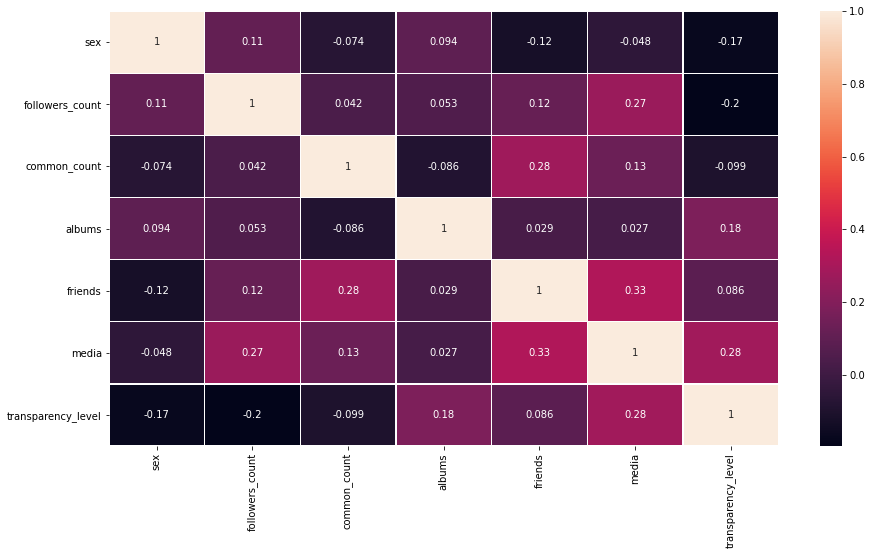

In [ ]:
sns.heatmap(df_digit.corr(), annot=True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,8)

### **8. Создание готового набора данных для проведения кластеризации**

In [ ]:
data = pd.concat([df_digit, df_le], axis=1)

In [ ]:
data.head()

,sex,followers_count,common_count,albums,friends,media,transparency_level,first_name,last_name,relation,home_town,city_new,work
0,0,27,1,10,156,465,5,112,15,3,17,14,35
1,1,0,9,1,138,247,4,70,102,1,11,9,5
2,1,0,9,0,287,342,3,113,97,0,7,14,44
3,0,0,1,0,269,4,2,16,139,0,7,14,37
4,0,217,1,1,263,2537,5,108,35,0,7,14,52


In [ ]:
data.columns

Index(['sex', 'followers_count', 'common_count', 'albums', 'friends', 'media',
       'transparency_level', 'first_name', 'last_name', 'relation',
       'home_town', 'city_new', 'work'],
      dtype='object')

### **9. Применение методов Scaler к набору данных**

In [ ]:
df_norm = data.copy(deep=True)
df_minmax = data.copy(deep=True)
df_stand = data.copy(deep=True)
df_maxabs = data.copy(deep=True)
df_robust = data.copy(deep=True)
df_powert = data.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

In [ ]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### **10. Создание конвейера для подбора лучшей модели**

In [ ]:
from sklearn.cluster import *
from sklearn.metrics import *

In [ ]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(), 
           AffinityPropagation(), 
           AgglomerativeClustering(), 
           MeanShift()]

metrics = pd.DataFrame(columns=['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [ ]:
r = 5

two_methods = ['KMeans', 'MiniBatchKMeans']

for j in float_frames:
  for l in methods:
    est = l.fit(j)

    method_name = str(est)[:str(est).find('(')]

    to_df = pd.DataFrame(est.labels_)
    to_df.columns = ['labels']
    n_labels = len(to_df.labels.unique())

    if method_name in two_methods:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
    else:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': '-'
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': '-'
                                }, ignore_index=True)

In [ ]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
33,AgglomerativeClustering,Not Scaled,0.72404,0.4257,-
34,MeanShift,Not Scaled,0.47507,0.85316,-
3,AgglomerativeClustering,Normalizer,0.42786,0.99489,-
4,MeanShift,Normalizer,0.41492,0.97129,-
0,KMeans,Normalizer,0.36983,1.0549,12.5096
1,MiniBatchKMeans,Normalizer,0.3536,1.17856,13.3332
30,KMeans,Not Scaled,0.35356,0.99557,1.33097e+07
2,AffinityPropagation,Normalizer,0.33807,1.1181,-
31,MiniBatchKMeans,Not Scaled,0.32173,1.01789,1.43774e+07
23,AgglomerativeClustering,RobustScaler,0.30769,1.70269,-


### **Лучшая комбинация AgglomerativeClustering + Not Scaled, но я воспользуюсь maxabs, потому что:**


In [ ]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df_maxabs

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

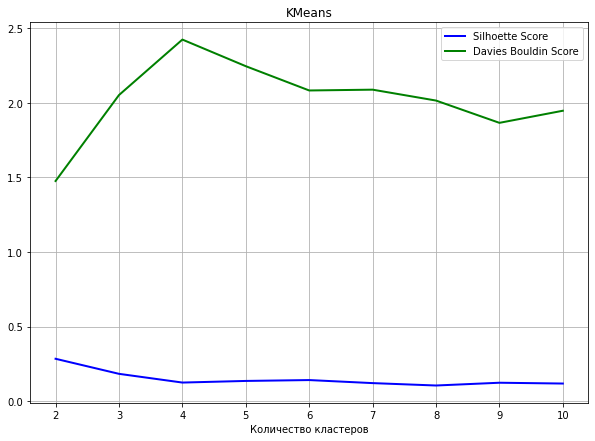

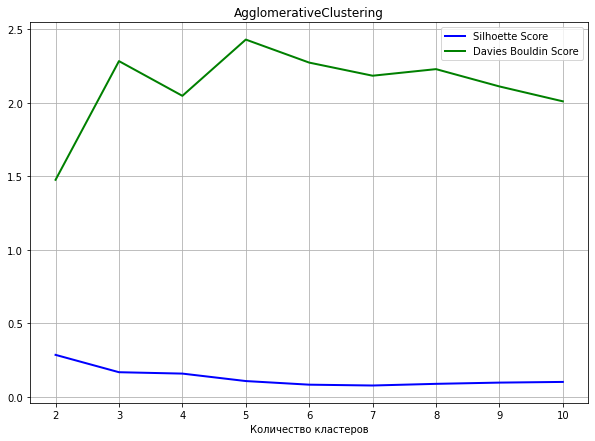

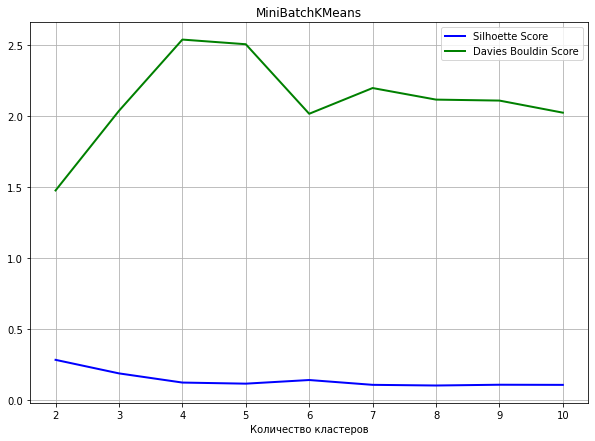

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

1. KMeans предлагает оптимальное количество кластеров 6, так как при таком количестве кластеров DBS еще не сильно скакнул, а SS не максимально, но и не слишком мало. 

2. AgglomerativeClustering предлагает оптимальное количество кластеров 7, так как DBS и SS оптимальны

3. MiniBatchKMeans предлагает оптимальное количество кластеров 6, так как при таком количестве кластеров DBS подходящий, а SS оптимальный

In [ ]:
x = df_maxabs
est = AgglomerativeClustering(n_clusters=8)
est.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8)

In [ ]:
print('SS/DBS', 
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))

SS/DBS 0.08674 / 2.22855


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


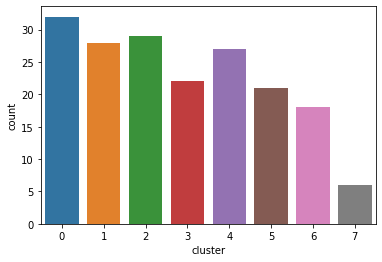

In [ ]:
labels = pd.DataFrame(est.labels_)
labels.columns = ['cluster']
df_clusters = pd.concat([df101, labels], axis=1)

sns.countplot(df_clusters.cluster)

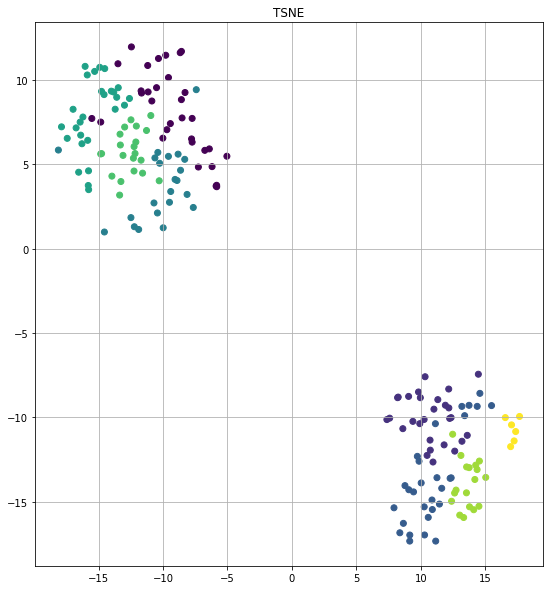

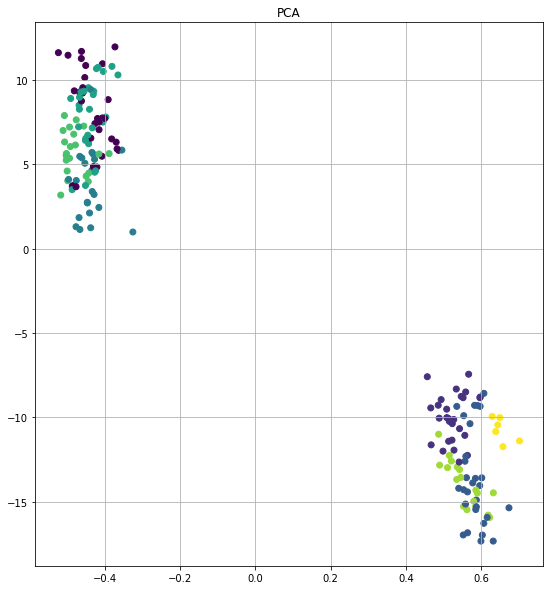

In [ ]:
from sklearn.manifold import *
from sklearn.decomposition import PCA

x = df_maxabs

tsne = TSNE(n_components=2
            ,random_state=22
            ).fit_transform(x)

pca = PCA().fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=est.labels_)
plt.title('TSNE')
plt.grid(True)

plt.figure(figsize=(20, 10))
plt.subplot(122)
plt.scatter(pca[:, 0], tsne[:, 1], c=est.labels_)
plt.title('PCA')
plt.grid(True)

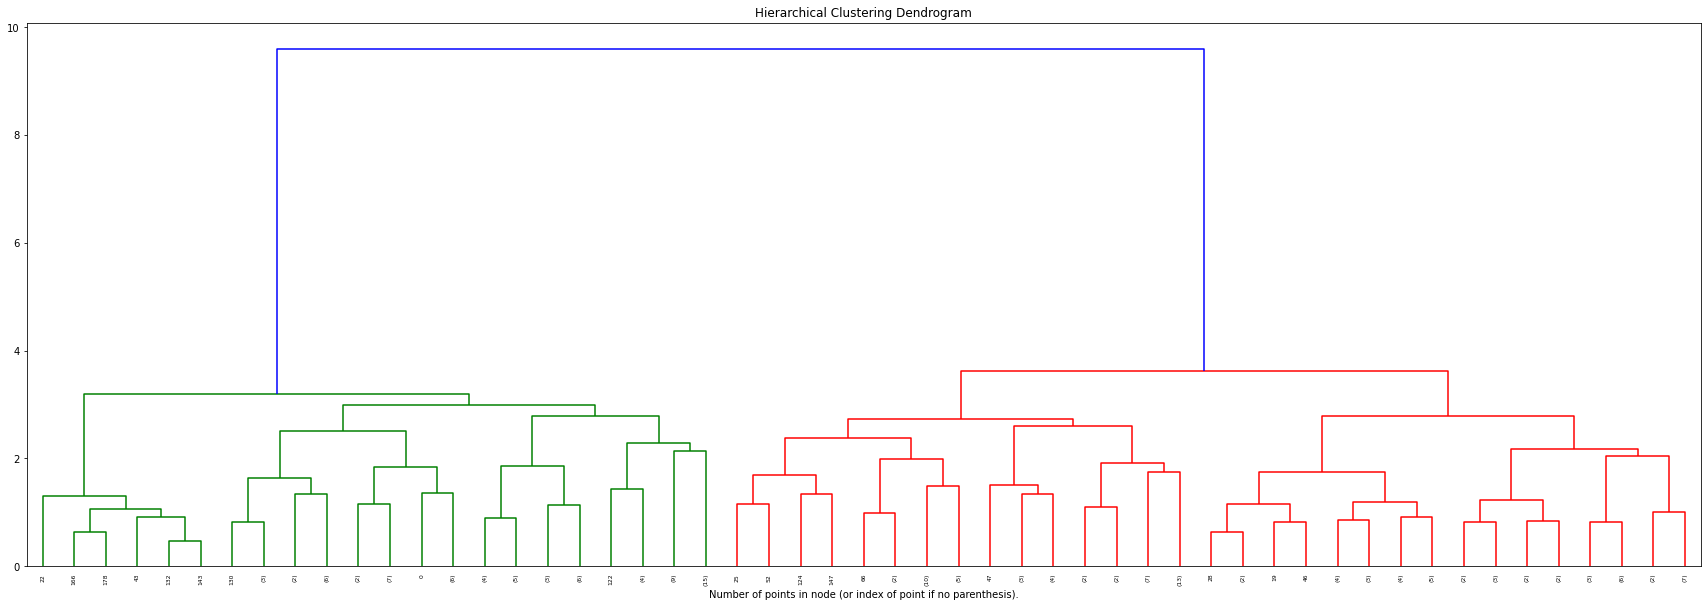

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()